In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [7]:
dataset = pd.read_csv('/content/Reviews.csv', nrows=250000)

In [8]:
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
dataset.shape

(78720, 10)

In [10]:
dataset['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

EDA

<Axes: title={'center': 'count of reviews by stars'}, xlabel='count', ylabel='score'>

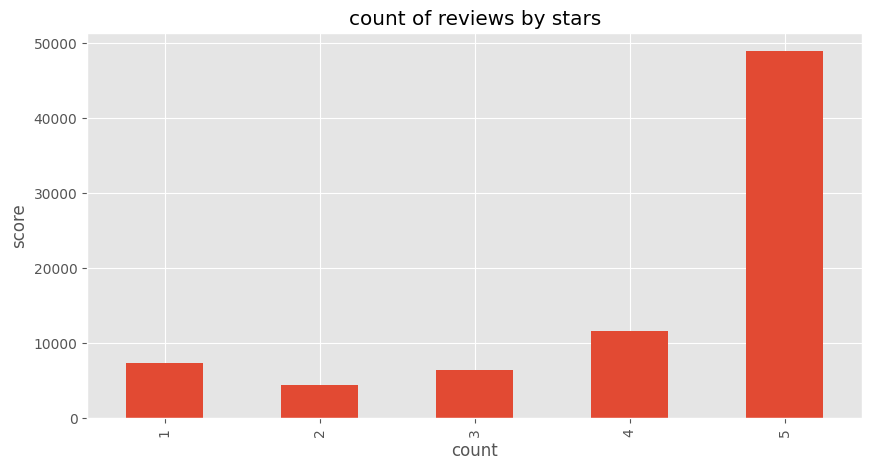

In [11]:
dataset['Score'].value_counts().sort_index().plot(kind='bar',title='count of reviews by stars',xlabel='count',ylabel='score',figsize=(10,5))

**basic** **nltk**

In [12]:
example = dataset['Text'][0]

In [13]:
example

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [14]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [15]:
word = nltk.word_tokenize(example)
print(word)

['I', 'have', 'bought', 'several', 'of', 'the', 'Vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', '.', 'The', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', '.', 'My', 'Labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most', '.']


In [16]:
sentences = nltk.sent_tokenize(example)
sentences

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality.',
 'The product looks more like a stew than a processed meat and it smells better.',
 'My Labrador is finicky and she appreciates this product better than  most.']

In [17]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [18]:
ps.stem(example)

'i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most.'

In [19]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatize = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [20]:
lemmatize.lemmatize(example)

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [21]:
nltk.download('averaged_perceptron_tagger_eng')
word = word_tokenize(example)
pos_tags = nltk.pos_tag(word)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [22]:
pos_tags

[('I', 'PRP'),
 ('have', 'VBP'),
 ('bought', 'VBN'),
 ('several', 'JJ'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Vitality', 'NNP'),
 ('canned', 'VBD'),
 ('dog', 'RP'),
 ('food', 'NN'),
 ('products', 'NNS'),
 ('and', 'CC'),
 ('have', 'VBP'),
 ('found', 'VBN'),
 ('them', 'PRP'),
 ('all', 'DT'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('of', 'IN'),
 ('good', 'JJ'),
 ('quality', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('product', 'NN'),
 ('looks', 'VBZ'),
 ('more', 'RBR'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('stew', 'NN'),
 ('than', 'IN'),
 ('a', 'DT'),
 ('processed', 'JJ'),
 ('meat', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('smells', 'VBZ'),
 ('better', 'RBR'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('Labrador', 'NNP'),
 ('is', 'VBZ'),
 ('finicky', 'JJ'),
 ('and', 'CC'),
 ('she', 'PRP'),
 ('appreciates', 'VBZ'),
 ('this', 'DT'),
 ('product', 'NN'),
 ('better', 'JJR'),
 ('than', 'IN'),
 ('most', 'JJS'),
 ('.', '.')]

In [23]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('corpora/words.zip/words/')
nltk.download('words')
named_entities = nltk.ne_chunk(pos_tags)

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Error loading corpora/words.zip/words/: Package
[nltk_data]     'corpora/words.zip/words/' not found in index
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [24]:
from nltk import word_tokenize, pos_tag, ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('chunkers/maxent_ne_chunker_tab/english_ace_multiclass/')
from nltk import word_tokenize, pos_tag, ne_chunk

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Error loading
[nltk_data]     chunkers/maxent_ne_chunker_tab/english_ace_multiclass/
[nltk_data]     : Package 'chunkers/maxent_ne_chunker_tab/english_ace_
[nltk_data]     multiclass/' not found in index


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 6.9 MB/s eta 0:00:00


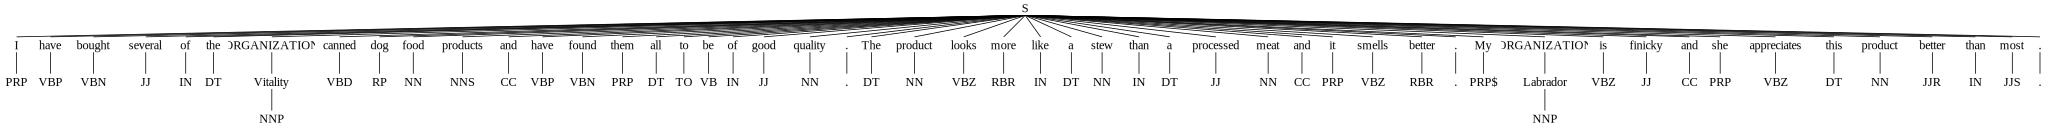

In [25]:
!pip install svgling
named_entities

VADER = Valence Aware Dictionary and sEntiment Reasoner


A rule-based sentiment analysis tool

Designed especially for social media & reviews

 Works out of the box (no training needed)


 ADER gives 4 scores for a sentence:

{
 'neg': 0.0,  negative

 'neu': 0.54, neutral

 'pos': 0.46, postive

 'compound': 0.6249 Compound
}

In [100]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from tqdm import tqdm

sentimnet_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
sentimnet_analyzer

In [28]:
sentimnet_analyzer.polarity_scores(example)

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [29]:
sentimnet_analyzer.polarity_scores("I am so Happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [30]:
sentimnet_analyzer.polarity_scores("I am so sad")

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

In [31]:
example[49:]

'food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [32]:
sentimnet_analyzer.polarity_scores(example[49:])

{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.9299}

In [33]:
data = pd.DataFrame(np.array(dataset['Text']), columns=['Text'])

In [34]:
data

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
...,...
78715,These chips are delectably delicious. I am on ...
78716,"Not too salty like regular supermarket chips, ..."
78717,"I agree with the company motto ""A Natural Obse..."
78718,The New York Cheddar flavor is my favorite of ...


In [35]:
df=dataset.head(500)

In [36]:
res = {}
for index, row in tqdm(df.iterrows(), total = len(df)):
   text = row['Text']
   myid = row['Id']
   res[myid] = sentimnet_analyzer.polarity_scores(text)


  0%|          | 0/500 [00:00<?, ?it/s]

In [37]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [38]:
# in df form ploarity score
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

In [39]:
# merged ploarity score into orginal dataset
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [40]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Text(0.5, 1.0, 'compound score by review score')

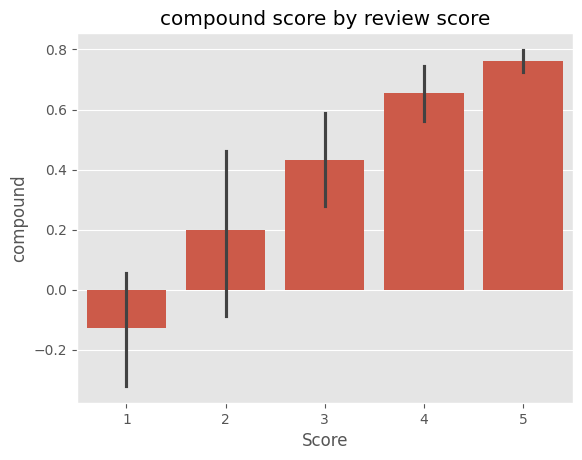

In [41]:
sns.barplot(data=vaders, x='Score', y='compound')
plt.xlabel('Score')
plt.ylabel('compound')
plt.title('compound score by review score')

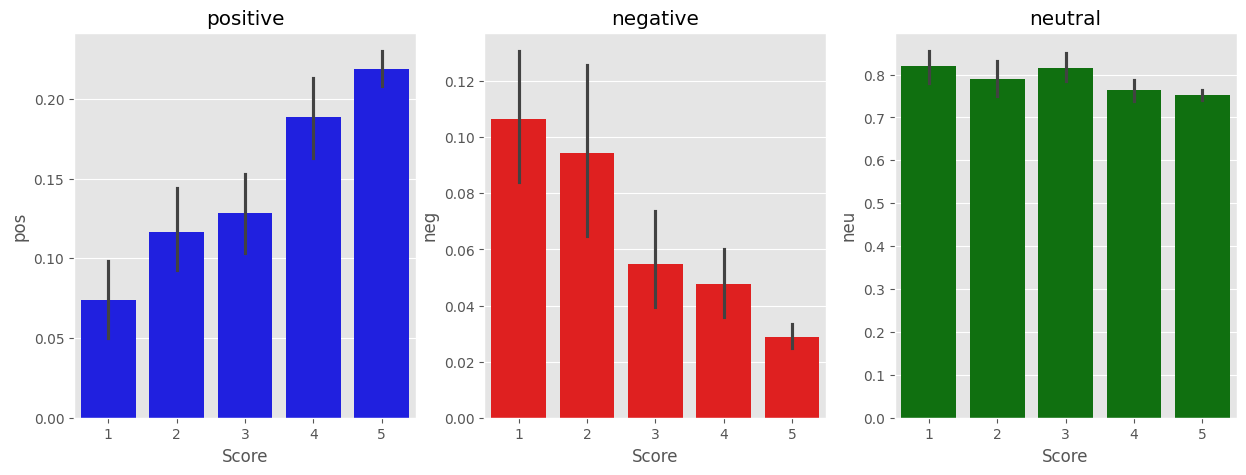

In [42]:
fig_size,axs = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders, x='Score', y='pos',ax=axs[0], color='blue')
sns.barplot(data=vaders, x='Score', y='neg',ax=axs[1], color='red')
sns.barplot(data=vaders, x='Score', y='neu',ax=axs[2], color='green')

axs[0].set_title('positive')
axs[1].set_title('negative')
axs[2].set_title('neutral')
plt.show()


**RoBERTa Pretrained Model - (Robustly Optimized BERT Approach)**

A Transformer-based language model

Learns context from surrounding words

Uses:

Self-attention

Bidirectional context

Large-scale pretraining

In [43]:
!pip install transformers

In [44]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [45]:
MODEL = "cardiffnlp/roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/893 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

RobertaForSequenceClassification LOAD REPORT from: cardiffnlp/roberta-base-sentiment
Key                             | Status     |  | 
--------------------------------+------------+--+-
roberta.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [46]:
# vader example on example
print(example)
sentimnet_analyzer.polarity_scores(example)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [47]:
# run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scroes = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [48]:
print(scores_dict)

{'roberta_neg': np.float32(-2.5902352), 'roberta_neu': np.float32(-0.92275625), 'roberta_pos': np.float32(3.0468972)}


In [49]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
  }
  return scores_dict

In [99]:
from tqdm import tqdm
res = {}
for i ,row in tqdm(df.iterrows(), total=len(df)):
  try:
      text = row['Text']
      myid = row['Id']
      vaders_result = sentimnet_analyzer.polarity_scores(text)
      roberta_result = polarity_scores_roberta(text)

      both_merged = {**vaders_result, **roberta_result}
      res[myid] = both_merged

  except RuntimeError:
      print(f'Broke for id {myid}')

 16%|█▋        | 82/500 [00:19<01:18,  5.31it/s]

Broke for id 83


 38%|███▊      | 188/500 [00:46<00:51,  6.02it/s]

Broke for id 187


100%|██████████| 500/500 [02:04<00:00,  4.03it/s]


In [75]:
vaders_result

{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.9811}

In [76]:
roberta_result

{'roberta_neg': np.float32(0.0023426625),
 'roberta_neu': np.float32(0.008143054),
 'roberta_pos': np.float32(0.98951423)}

In [77]:
both_merged = {**vaders_result, **roberta_result}
res[myid] = both_merged

In [78]:
both_merged

{'neg': 0.0,
 'neu': 0.678,
 'pos': 0.322,
 'compound': 0.9811,
 'roberta_neg': np.float32(0.0023426625),
 'roberta_neu': np.float32(0.008143054),
 'roberta_pos': np.float32(0.98951423)}

In [79]:
results_df =pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how='left')

In [80]:
results_df.head()

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.003485,0.018466,0.978050,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.227575,0.758839,0.013586,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.001341,0.018023,0.980636,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.001001,0.032512,0.966487,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001459,0.004819,0.993721,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# compare scores btw models

In [81]:
results_df.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

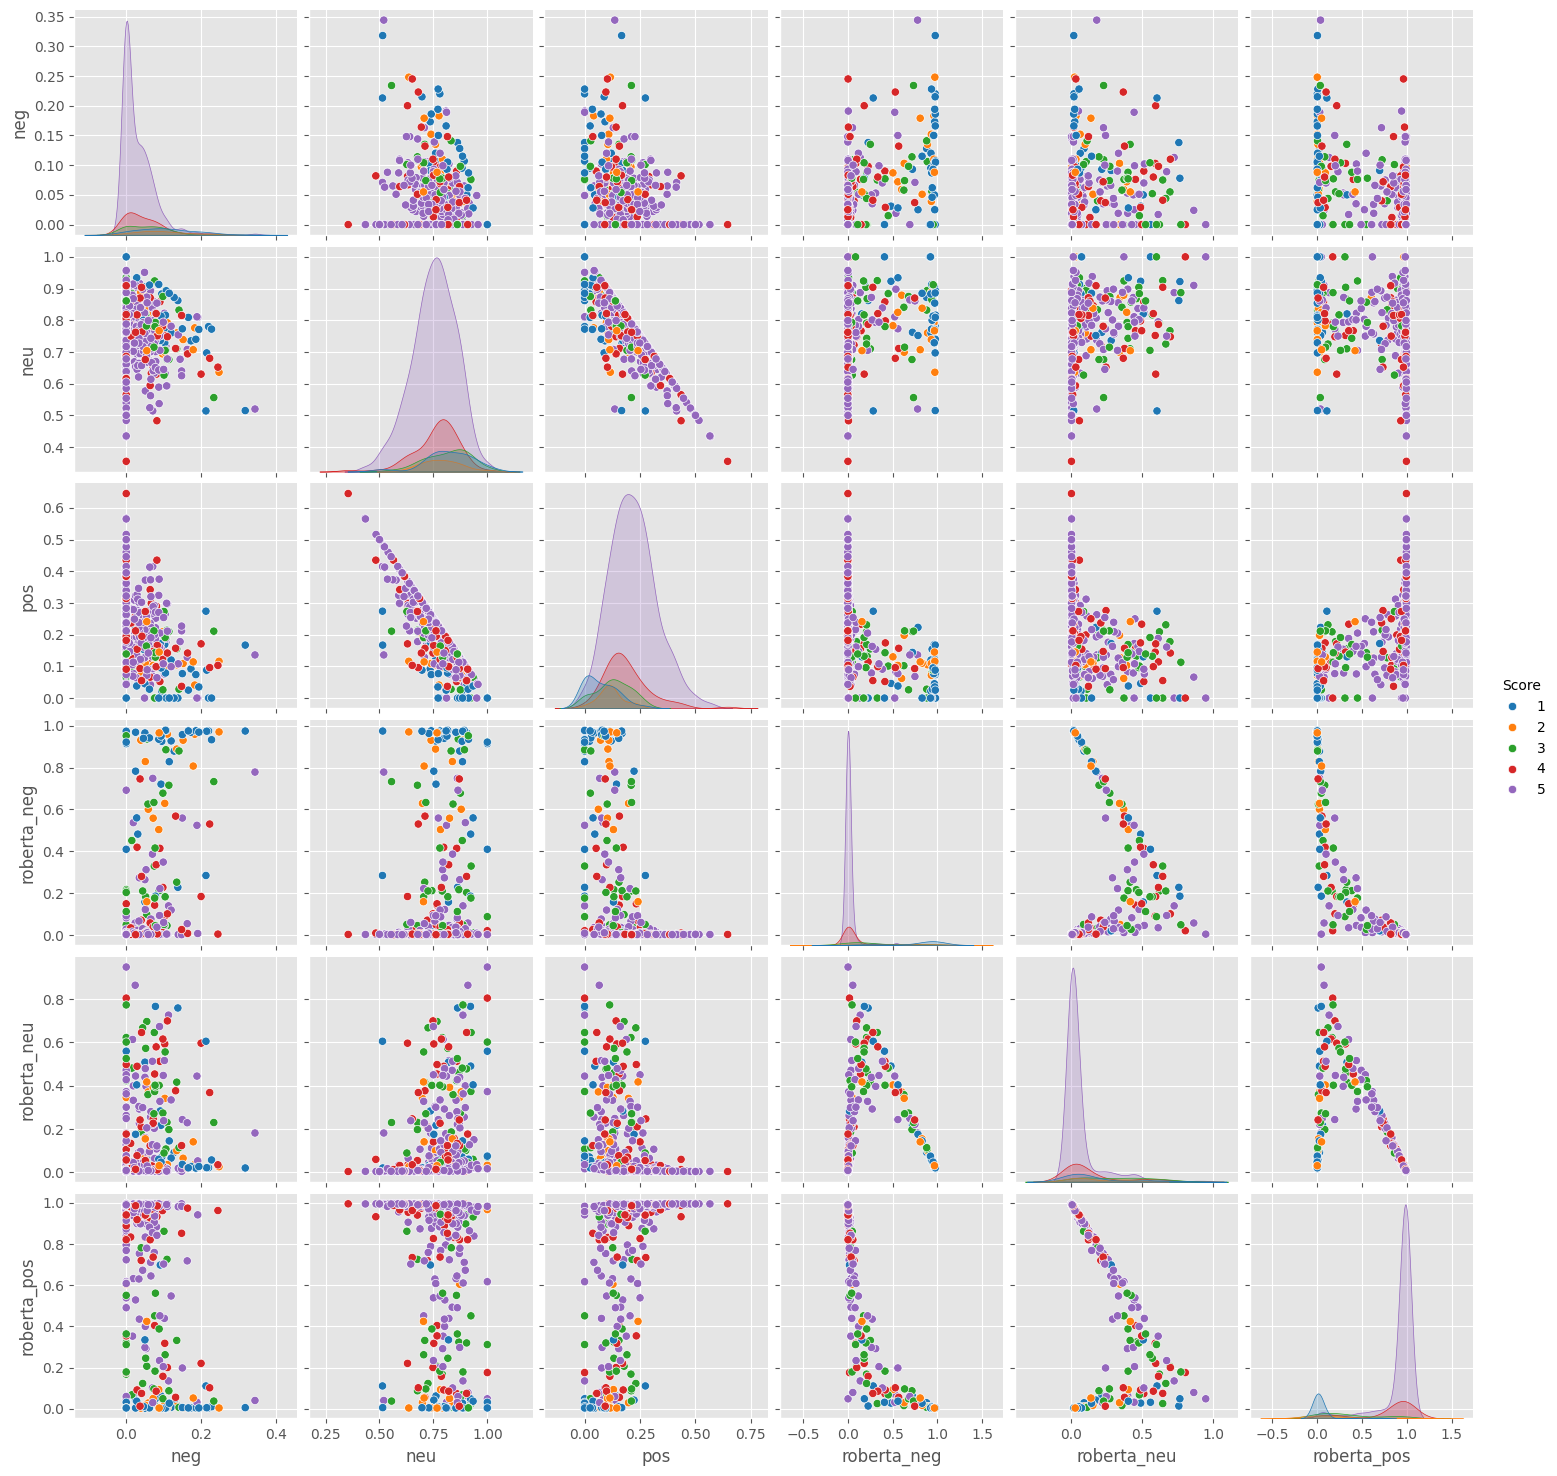

In [83]:
sns.pairplot(data=results_df, vars=['neg','neu','pos',
                                   'roberta_neg' , 'roberta_neu' , 'roberta_pos'],
             hue='Score', palette='tab10')
plt.show()

Review Examples:

In [84]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [86]:
results_df.query('Score == 1').sort_values('pos' , ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

# negative sentimnet 5 star review

In [87]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [90]:
results_df.query('Score == 5').sort_values('neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [95]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f.
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

In [96]:
sent_pipeline('I am so happy')

[{'label': 'POSITIVE', 'score': 0.9998812675476074}]

In [97]:
sent_pipeline('I am so sad')

[{'label': 'NEGATIVE', 'score': 0.9993782043457031}]

In [98]:
sent_pipeline('At morining something good happend i thought my day will good also but now i sad ')

[{'label': 'NEGATIVE', 'score': 0.9711650609970093}]